- Bibliotecas

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import YearLocator, DateFormatter
import plotly.express as px
import numpy as np
import seaborn as sn

- Conhecendo os Dados

In [4]:
df = pd.read_csv('dados_clima_recife_2005_2021.csv', sep = ',')


In [5]:
df.dtypes

Data                  object
Prec_Total_Diária    float64
Temp_Max_Diária      float64
Temp_Med_Diária      float64
Temp_Min_Diária      float64
Vento_Med_Diária     float64
dtype: object

In [6]:
df['Data'] = pd.to_datetime(df['Data'])


In [7]:
df.shape

(2598, 6)

In [8]:
df.dtypes

Data                 datetime64[ns]
Prec_Total_Diária           float64
Temp_Max_Diária             float64
Temp_Med_Diária             float64
Temp_Min_Diária             float64
Vento_Med_Diária            float64
dtype: object

In [9]:
df.isnull().sum()

Data                 0
Prec_Total_Diária    0
Temp_Max_Diária      0
Temp_Med_Diária      0
Temp_Min_Diária      0
Vento_Med_Diária     0
dtype: int64

In [10]:
df.head().round(1)

,Data,Prec_Total_Diária,Temp_Max_Diária,Temp_Med_Diária,Temp_Min_Diária,Vento_Med_Diária
0,2005-01-02,0.0,31.3,27.2,21.6,2.4
1,2005-01-03,0.0,31.2,27.8,25.3,3.0
2,2005-01-06,0.0,30.7,26.1,20.1,2.6
3,2005-01-07,0.0,31.1,26.0,20.4,1.8
4,2005-01-08,5.0,31.6,26.7,22.2,2.1


- Estatística descritiva da base

In [11]:
df.iloc[:, 1:6].describe().round(2)

,Prec_Total_Diária,Temp_Max_Diária,Temp_Med_Diária,Temp_Min_Diária,Vento_Med_Diária
count,2598.00,2598.00,2598.00,2598.00,2598.00
mean,3.88,30.44,26.06,22.47,1.69
std,11.76,1.61,1.33,1.55,0.57
min,0.00,24.00,21.95,17.50,0.00
25%,0.00,29.20,25.10,21.40,1.33
50%,0.00,30.70,26.27,22.40,1.67
75%,2.00,31.60,27.10,23.50,2.03
max,151.00,35.20,29.01,27.20,3.69


- Dias mais chuvosos, quentes e frios

In [12]:
filtro = df.nlargest(10, 'Prec_Total_Diária')
prec = filtro['Prec_Total_Diária'].iloc[0]
data = filtro['Data'].iloc[0]
print(f'O dia mais chuvoso foi {prec} mm em {data}')

O dia mais chuvoso foi 151.0 mm em 2019-06-14 00:00:00


In [13]:
filtro = df.nlargest(10, 'Temp_Max_Diária')
temp_max = filtro['Temp_Max_Diária'].iloc[0]
data = filtro['Data'].iloc[0]
print(f'O dia mais quente foi {temp_max} °C em {data}')

O dia mais quente foi 35.2 °C em 2014-11-12 00:00:00


In [14]:
filtro = df.nsmallest(10, 'Temp_Min_Diária')
temp_min = filtro['Temp_Min_Diária'].iloc[0]
data = filtro['Data'].iloc[0]
print(f'O dia mais frio foi {temp_min} °C em {data}')


O dia mais frio foi 17.5 °C em 2008-06-21 00:00:00


- Variação temporal

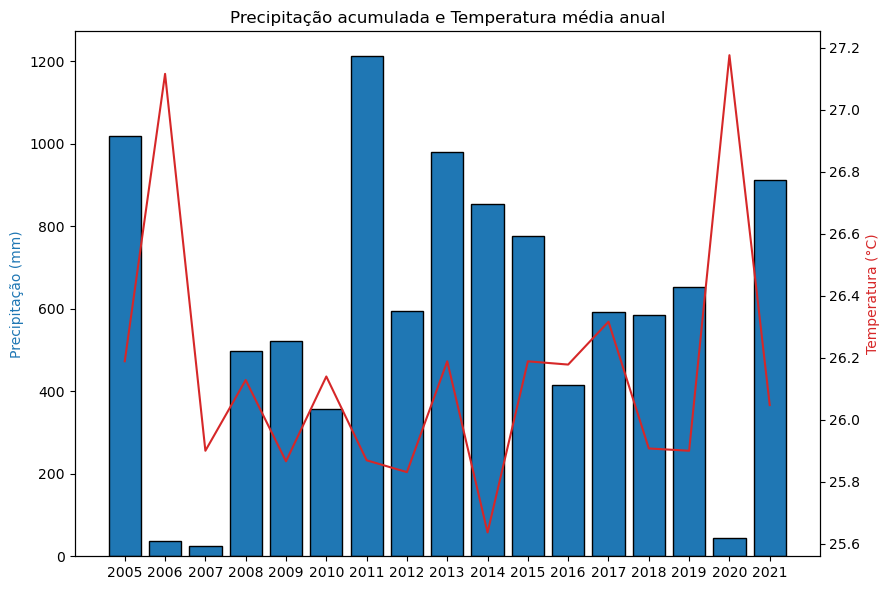

In [15]:
fig, ax1 = plt.subplots(figsize = (9,6))

anual_prec = df.groupby(df.Data.dt.year)['Prec_Total_Diária'].sum()
x = anual_prec.index
x = x.astype('str')
y = anual_prec

anual_temp = df.groupby(df.Data.dt.year)['Temp_Med_Diária'].mean()
x = anual_temp.index
x = x.astype('str')
y2 = anual_temp

plt.title('Precipitação acumulada e Temperatura média anual')

ax1.set_ylabel('Precipitação (mm)', color= 'tab:blue')
ax1.bar(x, y , color= 'tab:blue', edgecolor = 'black')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis

ax2.set_ylabel('Temperatura (°C)', color= 'tab:red')  # we already handled the x-label with ax1
ax2.plot(x, y2, color= 'tab:red')
ax2.tick_params(axis='y')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

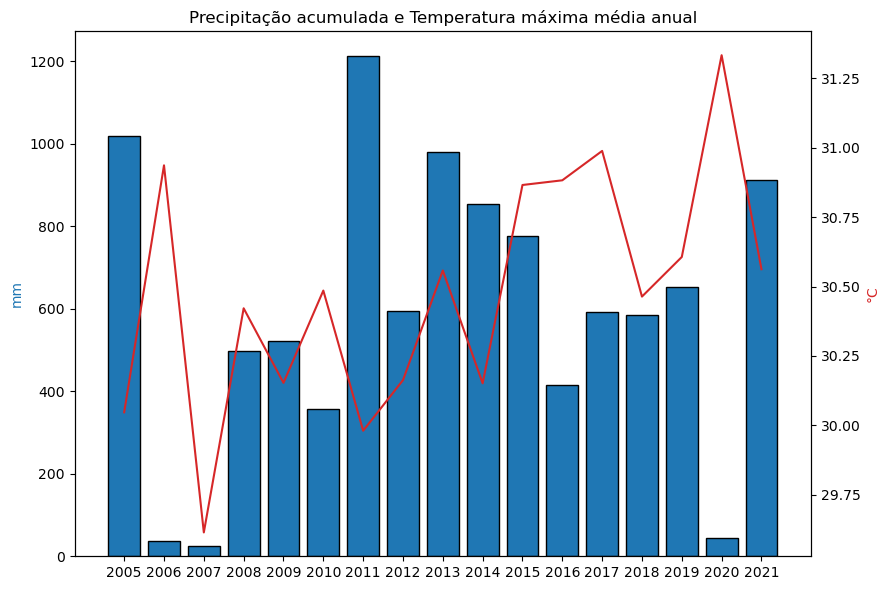

In [16]:
fig, ax1 = plt.subplots(figsize = (9,6))

anual_prec = df.groupby(df.Data.dt.year)['Prec_Total_Diária'].sum()
x = anual_prec.index
x = x.astype('str')
y = anual_prec

anual_temp = df.groupby(df.Data.dt.year)['Temp_Max_Diária'].mean()
x = anual_temp.index
x = x.astype('str')
y2 = anual_temp

plt.title('Precipitação acumulada e Temperatura máxima média anual')

ax1.set_ylabel('mm', color= 'tab:blue')
ax1.bar(x, y , color= 'tab:blue', edgecolor = 'black')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis

ax2.set_ylabel('°C', color= 'tab:red')  # we already handled the x-label with ax1
ax2.plot(x, y2, color= 'tab:red')
ax2.tick_params(axis='y')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

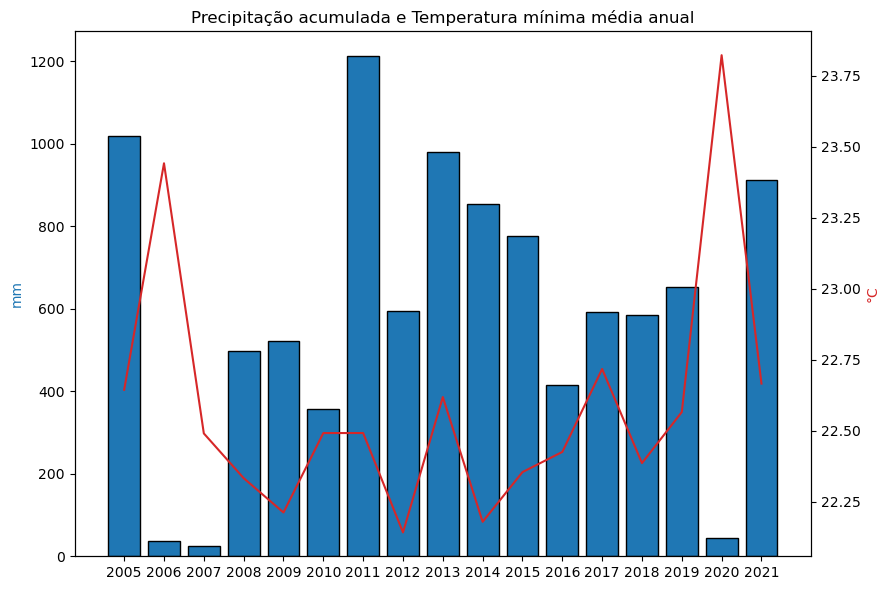

In [17]:
fig, ax1 = plt.subplots(figsize = (9,6))

anual_prec = df.groupby(df.Data.dt.year)['Prec_Total_Diária'].sum()
x = anual_prec.index
x = x.astype('str')
y = anual_prec

anual_temp = df.groupby(df.Data.dt.year)['Temp_Min_Diária'].mean()
x = anual_temp.index
x = x.astype('str')
y2 = anual_temp

plt.title('Precipitação acumulada e Temperatura mínima média anual')

ax1.set_ylabel('mm', color= 'tab:blue')
ax1.bar(x, y , color= 'tab:blue', edgecolor = 'black')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis

ax2.set_ylabel('°C', color= 'tab:red')  # we already handled the x-label with ax1
ax2.plot(x, y2, color= 'tab:red')
ax2.tick_params(axis='y')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

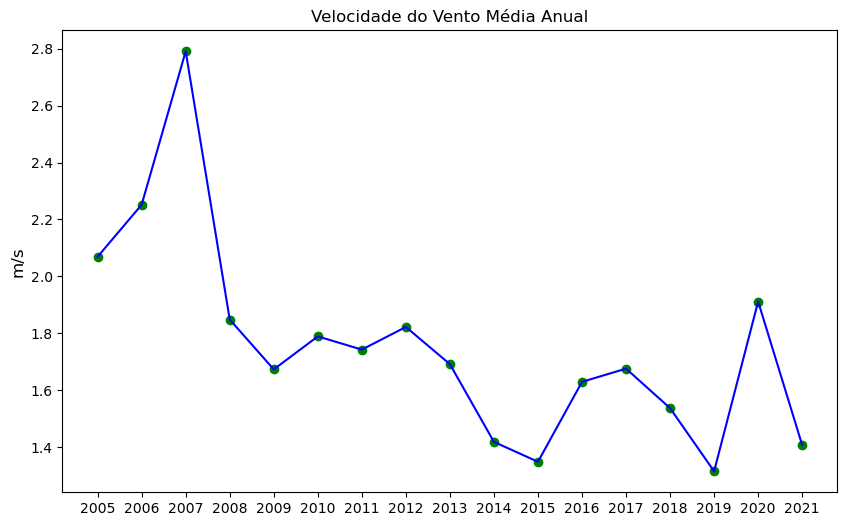

In [18]:
fig, ax = plt.subplots(figsize = (10,6))

anual = df.groupby(df.Data.dt.year)['Vento_Med_Diária'].mean()
x = anual.index
x = x.astype('str')
y = anual

ax.scatter(x, y, color = 'green')
ax.plot(x,y, color = 'blue')
ax.set_title('Velocidade do Vento Média Anual', fontsize = 12)
ax.set_ylabel('m/s', fontsize = 12)
plt.show()

- Correlação

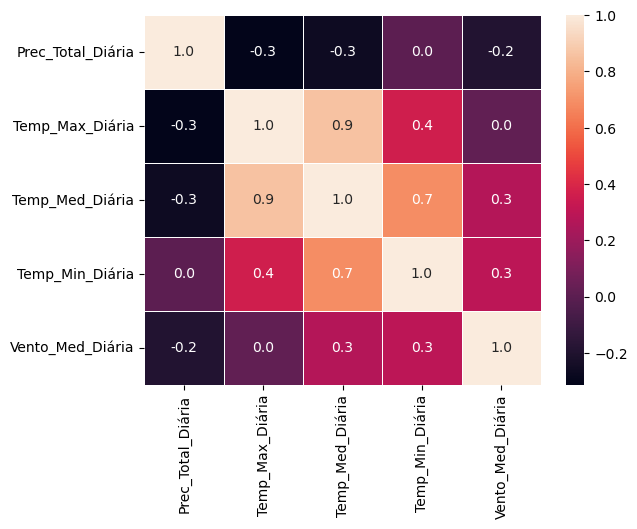

In [19]:
corre = df.iloc[:, 1:6].corr()
mapa_calor = sn.heatmap(corre, annot = True, fmt=".1f", linewidths=.6)
mapa_calor

plt.show()

- Correlação linear da temperatura média e precipitação acumulada anual 

In [20]:
anual_prec = df.groupby(df.Data.dt.year)['Prec_Total_Diária'].sum()
anual_temp = df.groupby(df.Data.dt.year)['Temp_Med_Diária'].mean()
x = anual_temp
y = anual_prec


In [21]:
df_prec_temp = pd.DataFrame(x)
df_prec_temp['Prec_Total_Diária'] = y
df_prec_temp.corr()


,Temp_Med_Diária,Prec_Total_Diária
Temp_Med_Diária,1.000000,-0.542149
Prec_Total_Diária,-0.542149,1.000000


Existe correlação inversa moderada. Sendo assim, pode-se explicar a relação entre a chuva e temperatura, por exemplo, quanto maior a precipitação menor será a temperatura média.

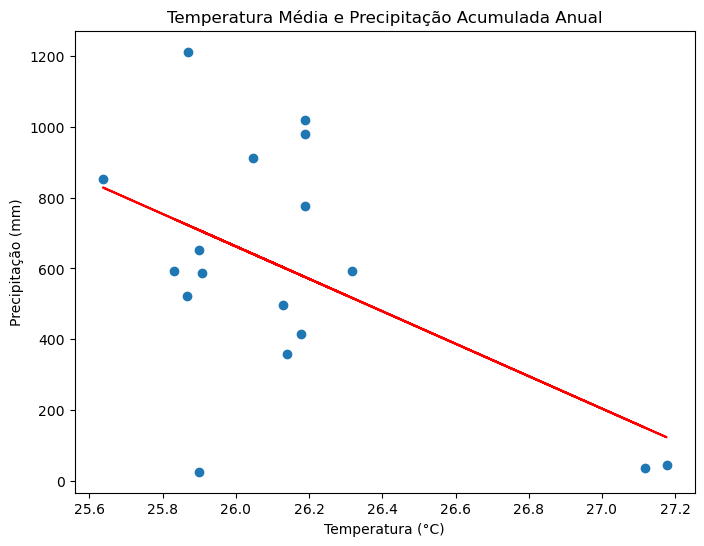

In [22]:
fig, ax = plt.subplots(figsize = (8,6))

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
ax.plot(x,p(x),"r")

ax.scatter(x, y)
ax.set_title('Temperatura Média e Precipitação Acumulada Anual', fontsize = 12)
ax.set_ylabel('Precipitação (mm)', fontsize = 10)
ax.set_xlabel('Temperatura (°C)', fontsize = 10)

plt.show()

Tendência da temperatura e precipitação 

In [31]:
anos = list(range(1, 18))
temp = anual_temp
prec = anual_prec

In [37]:
df_prec_temp = pd.DataFrame(temp)
df_prec_temp['Prec_Total_Diária'] = prec
df_prec_temp['Anos'] = anos

df_prec_temp.corr()


,Temp_Med_Diária,Prec_Total_Diária,Anos
Temp_Med_Diária,1.000000,-0.542149,0.016360
Prec_Total_Diária,-0.542149,1.000000,0.114603
Anos,0.016360,0.114603,1.000000


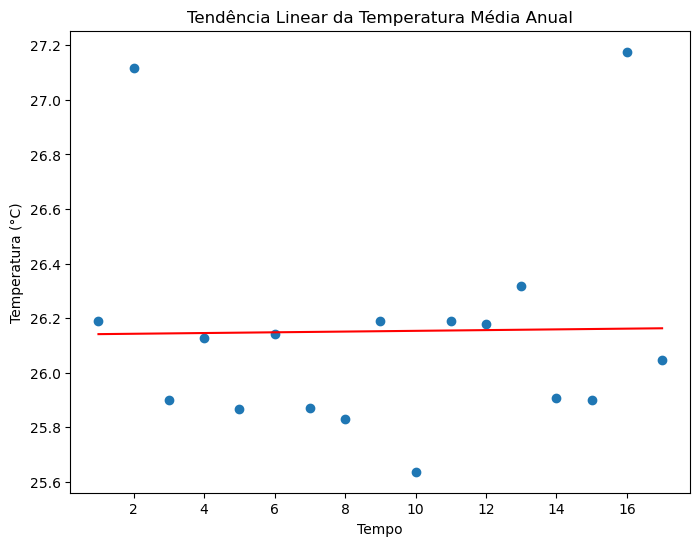

In [34]:
fig, ax = plt.subplots(figsize = (8,6))

z = np.polyfit(anos, temp, 1)
p = np.poly1d(z)
ax.plot(anos,p(anos),"r")

ax.scatter(anos, temp)
ax.set_title('Tendência Linear da Temperatura Média Anual', fontsize = 12)
ax.set_ylabel('Temperatura (°C)', fontsize = 10)
ax.set_xlabel('Tempo', fontsize = 10)

plt.show()

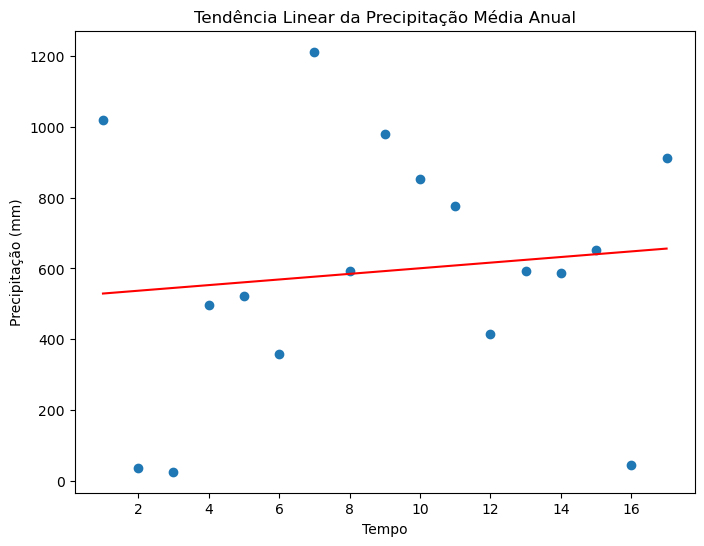

In [36]:
fig, ax = plt.subplots(figsize = (8,6))

z = np.polyfit(anos, prec, 1)
p = np.poly1d(z)
ax.plot(anos,p(anos),"r")

ax.scatter(anos, prec)
ax.set_title('Tendência Linear da Precipitação Média Anual', fontsize = 12)
ax.set_ylabel('Precipitação (mm)', fontsize = 10)
ax.set_xlabel('Tempo', fontsize = 10)

plt.show()

A correlação entre a temperatura e os anos de 2005 a 2021 possuem uma correlação quase nula. A partir disso pode-se concluir que são variáveis estatísticamentes independentes.

A correlação da precipitação e dos anos de 2005 a 2021 têm uma relação fraca positiva. Conclui-se que o aumento da precipitação média anual pode ser uma parte explicada a partir do tempo.